Mean Reversion Trading Strategy on NVDA Stock

In [ ]:
#Description: Mean Reversion Trading Strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import files
files.upload()

Saving NVDA.csv to NVDA.csv


{'NVDA.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-05-21,15.163750,15.222000,14.869500,14.991750,14.961270,672992000\n2021-05-24,15.212500,15.745000,15.176000,15.612000,15.580259,554816000\n2021-05-25,15.766000,15.818500,15.482500,15.647750,15.615936,435408000\n2021-05-26,15.734250,15.793750,15.586250,15.700000,15.668079,370440000\n2021-05-27,15.699750,15.750000,15.460000,15.488000,15.456509,581476000\n2021-05-28,15.501000,16.277500,15.501000,16.244499,16.211472,644536000\n2021-06-01,16.270000,16.388250,15.903250,16.264500,16.231430,472804000\n2021-06-02,16.252251,16.918751,16.235500,16.778250,16.744135,594168000\n2021-06-03,16.700750,17.259001,16.583000,16.969749,16.935247,580008000\n2021-06-04,17.112499,17.660999,17.095501,17.578251,17.542513,617120000\n2021-06-07,17.571251,17.812500,17.192751,17.618999,17.583178,575756000\n2021-06-08,17.527250,17.621500,17.250999,17.457001,17.421511,323848000\n2021-06-09,17.515751,17.575001,17.255751,17.358250,17.326927,381656000\n2021-0

In [6]:
df = pd.read_csv('NVDA.csv')
#date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop(['Date'], inplace = True, axis =1 )
df

,Open,High,Low,Close,Adj Close,Volume
2021-05-21,15.163750,15.222000,14.869500,14.991750,14.961270,672992000
2021-05-24,15.212500,15.745000,15.176000,15.612000,15.580259,554816000
2021-05-25,15.766000,15.818500,15.482500,15.647750,15.615936,435408000
2021-05-26,15.734250,15.793750,15.586250,15.700000,15.668079,370440000
2021-05-27,15.699750,15.750000,15.460000,15.488000,15.456509,581476000
...,...,...,...,...,...,...
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,507542000


In [7]:
#SMA: Simple Moving Average

def SMA(data, period = 30, column = 'Close'):
  return data[column].rolling(window = period).mean()

In [8]:
df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close'] / df['SMA']
df


,Open,High,Low,Close,Adj Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
2021-05-21,15.163750,15.222000,14.869500,14.991750,14.961270,672992000,NaN,NaN,NaN,NaN
2021-05-24,15.212500,15.745000,15.176000,15.612000,15.580259,554816000,NaN,0.041373,0.040540,NaN
2021-05-25,15.766000,15.818500,15.482500,15.647750,15.615936,435408000,NaN,0.002290,0.002287,NaN
2021-05-26,15.734250,15.793750,15.586250,15.700000,15.668079,370440000,NaN,0.003339,0.003334,NaN
2021-05-27,15.699750,15.750000,15.460000,15.488000,15.456509,581476000,NaN,-0.013503,-0.013595,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,112.201619,0.017514,0.017363,1.175384
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,113.945476,-0.006824,-0.006848,1.149497
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100,115.997905,0.035120,0.034517,1.168814
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,507542000,117.712191,-0.035403,-0.036045,1.111015


In [12]:
df['Ratios'].describe()

percentiles = [15,20,50,80,85]
ratios = df['Ratios'].dropna()
percentile_value = np.percentile(ratios, percentiles)
percentile_value

array([0.93348621, 0.95130154, 1.03200285, 1.10578577, 1.12231464])

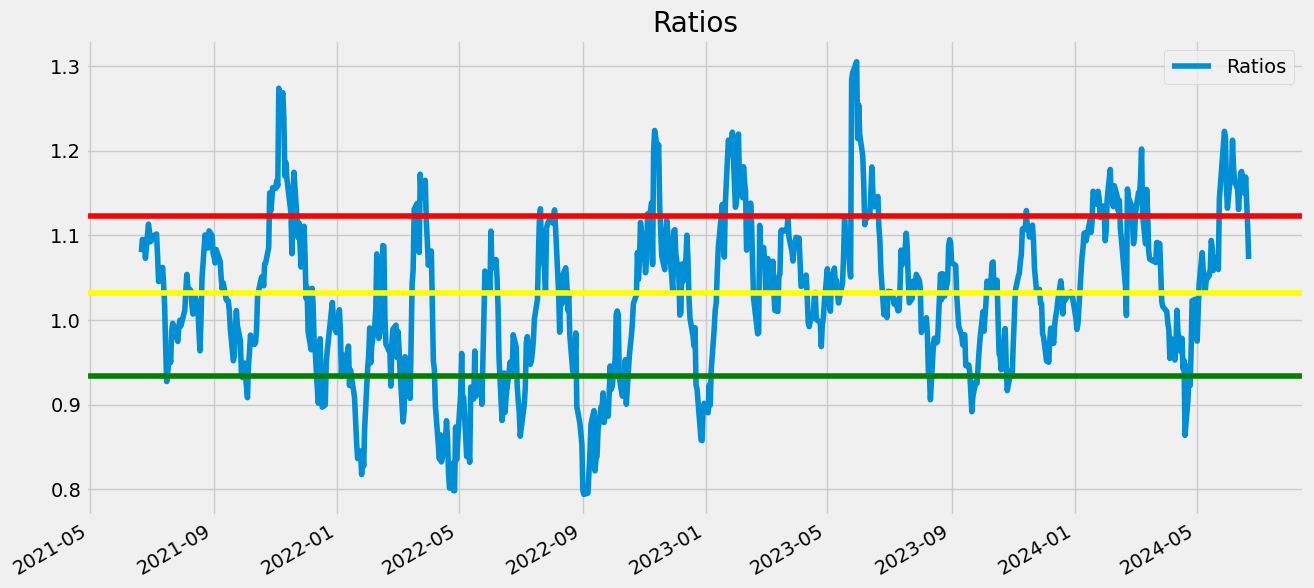

In [14]:
plt.figure(figsize =(14,7))
plt.title('Ratios')

df['Ratios'].dropna().plot(legend = True)
plt.axhline(percentile_value[0], c='green', label = '15th Percentile')
plt.axhline(percentile_value[2], c='yellow', label = '50th Percentile')
plt.axhline(percentile_value[-1], c='red', label = '85th Percentile')


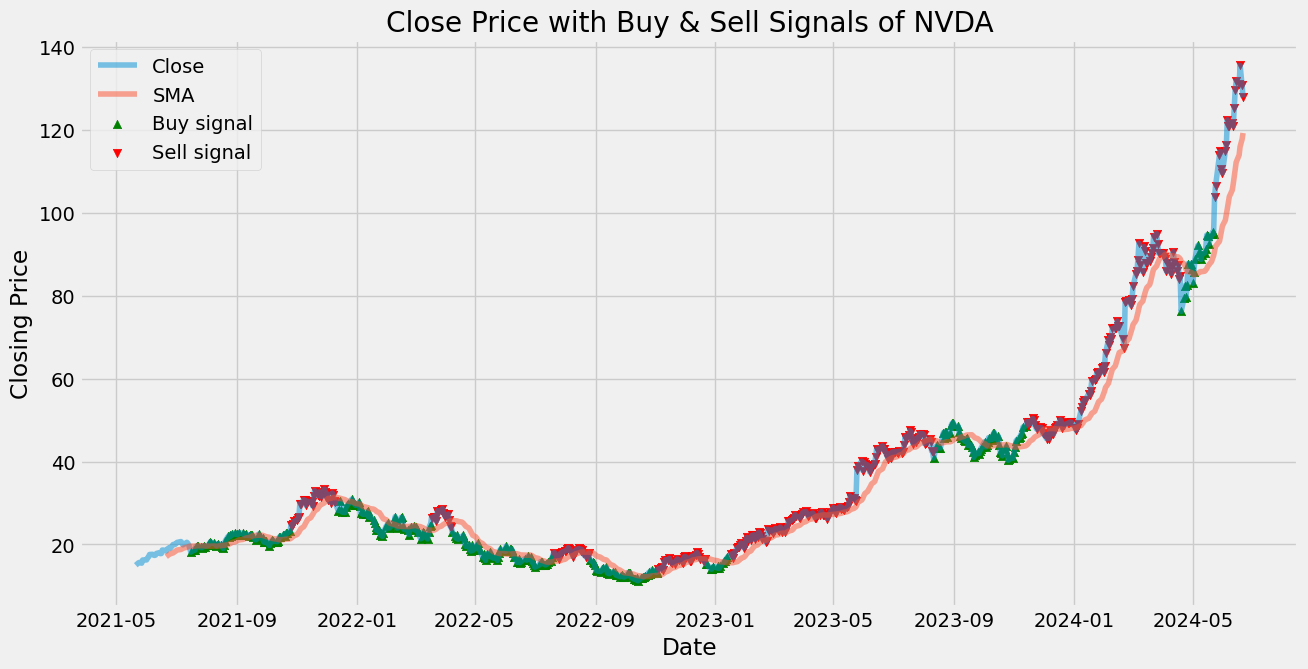

In [22]:
#buy and sell signals

sell = percentile_value[-1] #85th
buy= percentile_value[0] #15th

df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])

#ffill to fill the missing values
df['Positions'] = df['Positions'].ffill()

df['Buy'] = np.where(df.Positions ==1, df['Close'],np.nan)
df['Sell'] = np.where(df.Positions ==-1, df['Close'],np.nan)

plt.figure(figsize =(14,7))
plt.title('Close Price with Buy & Sell Signals of NVDA')
plt.plot(df['Close'], alpha = 0.5, label = 'Close')
plt.plot(df['SMA'], alpha = 0.5, label ='SMA')
plt.scatter(df.index, df['Buy'],color = 'green', label ='Buy signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'],color = 'red', label ='Sell signal', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [23]:
df['Strategy_Returns'] = df.Positions.shift(1)*df.Log_Returns
df['Strategy_Returns']


2021-05-21         NaN
2021-05-24         NaN
2021-05-25         NaN
2021-05-26         NaN
2021-05-27         NaN
                ...   
2024-06-14   -0.017363
2024-06-17    0.006848
2024-06-18   -0.034517
2024-06-20    0.036045
2024-06-21    0.022747
Name: Strategy_Returns, Length: 776, dtype: float64

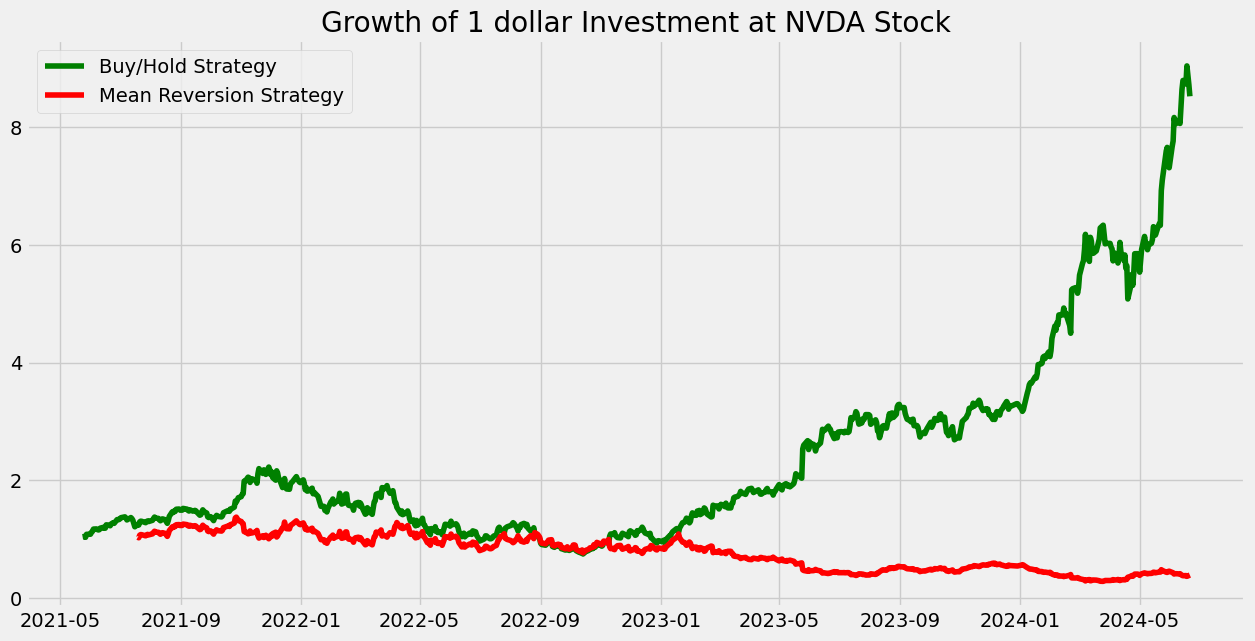

In [25]:
plt.figure(figsize =(14,7))
plt.title('Growth of 1 dollar Investment at NVDA Stock')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c='green', label = 'Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c='red', label = 'Mean Reversion Strategy')

plt.legend()
plt.show()

In [27]:
#Returns for both strategy
print('Buy & Hold Strategy Returns:', np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1)
print('Mean Reversion Strategy Returns:', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)

Buy & Hold Strategy Returns: 7.527269931795836
Mean Reversion Strategy Returns: -0.6083668015856736
